In [1]:
import pickle
from collections import defaultdict
%run utils_rf

/home/joshua/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
with open('mae_results_dec.pkl','rb') as f:
    mae_results = pickle.load(f)

In [3]:
def get_summaries(results):
    scores = defaultdict(list)
    for i in range(20):
        for run in results[i]:
            score = results[i][run]['avg_score']
            features = results[i][run]['feature_names']
            scores[features].append(score)
    score_summaries = defaultdict(dict)
    for features in scores:
        score_summaries[features]['mean'] = np.mean(scores[features])
        score_summaries[features]['std'] = np.std(scores[features])
        score_summaries[features]['count'] = len(scores[features])
    return score_summaries

In [4]:
def find_best(results, n):
    score_summaries = get_summaries(results)
    best_dict = defaultdict(dict)
    for i in range(n):
        score_summaries_filtered = defaultdict(dict)
        for features in score_summaries:
            if score_summaries[features]['count']>i:
                score_summaries_filtered[features]=score_summaries[features]
        best = -1
        best_features = []
        for features in score_summaries_filtered:
            if score_summaries_filtered[features]['mean']>best:
                best = score_summaries_filtered[features]['mean']
                best_features = features
        best_dict[i + 1]['score'] = best
        best_dict[i + 1]['features'] = best_features
    return best_dict

In [5]:
find_best(mae_results,6)

defaultdict(dict,
            {1: {'score': -0.12292000601042244,
              'features': ('value.Critical Thinking',
               'value.Systems Evaluation',
               'value.Fluency of Ideas',
               'value.Category Flexibility',
               'value.Memorization',
               'value.Flexibility of Closure',
               'value.Selective Attention',
               'value.Customer and Personal Service',
               'value.Computers and Electronics',
               'value.Chemistry')},
             2: {'score': -0.12670993556290833,
              'features': ('value.Mathematics Skill',
               'value.Monitoring',
               'value.Service Orientation',
               'value.Technology Design',
               'value.Systems Evaluation',
               'value.Time Management',
               'value.Management of Financial Resources',
               'value.Category Flexibility',
               'value.Clerical',
               'value.Personnel and Human

In [6]:
def find_best_in_run(results):
    best_dict = defaultdict(dict)
    
    for i in range(20):
        best = -1
        best_features = []
        for run in results[i]:
            score = results[i][run]['avg_score']
            features = results[i][run]['feature_names']
            if score>best:
                best=score
                best_features = features
        best_dict[i]['score'] = best
        best_dict[i]['features'] = best_features 
    return best_dict

In [7]:
run_bests = find_best_in_run(mae_results)
best_lens = []
for i in range(5):
    best_lens.append(len(run_bests[i]['features']))

In [8]:
run_bests

defaultdict(dict,
            {0: {'score': -0.13415712611145333,
              'features': ('value.Service Orientation',
               'value.Operation and Control',
               'value.Time Management',
               'value.Management of Financial Resources',
               'value.Fluency of Ideas',
               'value.Category Flexibility',
               'value.Speed of Closure',
               'value.Flexibility of Closure',
               'value.Visualization',
               'value.Selective Attention',
               'value.Dynamic Strength',
               'value.Dynamic Flexibility',
               'value.Personnel and Human Resources',
               'value.Computers and Electronics')},
             1: {'score': -0.13588839062838393,
              'features': ('value.Mathematics Skill',
               'value.Active Learning',
               'value.Monitoring',
               'value.Coordination',
               'value.Persuasion',
               'value.Service Orientat

(array([2., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 1.]),
 array([14. , 14.7, 15.4, 16.1, 16.8, 17.5, 18.2, 18.9, 19.6, 20.3, 21. ,
        21.7, 22.4, 23.1, 23.8, 24.5, 25.2, 25.9, 26.6, 27.3, 28. ]),
 <a list of 20 Patch objects>)

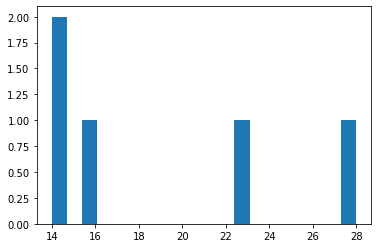

In [9]:
plt.hist(best_lens,bins=20)

In [10]:
performance = []
for i in range(20):
    feature_count_scores = np.zeros(30)
    for run in mae_results[i]:
        feature_count = len(mae_results[i][run]['feature_idx'])
        score = abs(mae_results[i][run]['avg_score'])
        if score > feature_count_scores[feature_count-1]:
            feature_count_scores[feature_count-1]=score
    performance.append(feature_count_scores)

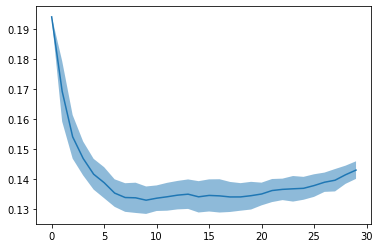

In [11]:
performance = pd.DataFrame(performance)
avg_score = performance.mean(axis=0)
std_score = performance.std(axis=0)
plt.plot(avg_score)
plt.fill_between(range(0,30),avg_score-std_score,avg_score+std_score,alpha=0.5)
plt.show()

In [12]:
#consitency in bests!
all_best_features = np.asarray(run_bests[0]['features'])
for i in range(1,20):
    new = np.asarray(run_bests[i]['features'])
    all_best_features = np.append(all_best_features,new)

In [13]:
unique, counts = np.unique(all_best_features, return_counts=True)
best_feature_counts = dict(zip(unique, counts))
pd.Series(best_feature_counts).sort_values(ascending=False)

value.Computers and Electronics            19
value.Management of Financial Resources    19
value.Service Orientation                  18
value.Category Flexibility                 17
value.Finger Dexterity                     13
value.Fluency of Ideas                     12
value.Science                              11
value.Chemistry                            10
value.Flexibility of Closure                9
value.Time Management                       9
value.Selective Attention                   9
value.Monitoring                            8
value.Mathematics Skill                     7
value.Memorization                          7
value.Management of Material Resources      7
value.Personnel and Human Resources         6
value.Technology Design                     6
value.Fine Arts                             6
value.Foreign Language                      6
value.Inductive Reasoning                   6
value.Critical Thinking                     6
value.Persuasion                  

In [14]:
chosen = ['value.Critical Thinking',
               'value.Systems Evaluation',
               'value.Fluency of Ideas',
               'value.Category Flexibility',
               'value.Memorization',
               'value.Flexibility of Closure',
               'value.Selective Attention',
               'value.Customer and Personal Service',
               'value.Computers and Electronics',
               'value.Chemistry']

In [15]:
for feature in chosen:
    print(feature)
    print(best_feature_counts[feature])

value.Critical Thinking
6
value.Systems Evaluation
2
value.Fluency of Ideas
12
value.Category Flexibility
17
value.Memorization
7
value.Flexibility of Closure
9
value.Selective Attention
9
value.Customer and Personal Service
4
value.Computers and Electronics
19
value.Chemistry
10
